In [1]:
import warnings
warnings.filterwarnings('ignore')

from Useful_functions import print_cm, print_means
import pickle
import numpy as np
from Running_models import print_base_metrics
from Useful_functions import print_bal_acc_for_more_functions

import os

In [2]:
sizes = [2261, 7439, 18957, 22111, 24704, 3465, 5572, 8885, 14363, 5534]
cum_sizes = np.cumsum(sizes)

list_labels = ('airport', 'airport hangar', 'airport terminal', 'amusement park', 'aquaculture', 'archaeological site', 'barn', 
                   'border checkpoint', 'burial site', 'car dealership', 'construction site', 'crop field', 'dam', 'debris/rubble', 
                   'educational institution', 'electric substation', 'factory/powerplant', 'fire station', 'flooded road', 'fountain', 
                   'gas station', 'golf course', 'ground transportation station', 'helipad', 'hospital', 'impoverished settlement', 
                   'interchange', 'lake/pond', 'lighthouse', 'military facility', 'multi-unit residential', 'nuclear powerplant', 
                   'office building', 'oil/gas facility', 'park', 'parking lot/garage', 'place of worship', 'police station', 'port', 
                   'prison', 'race track', 'railway bridge', 'recreational facility', 'road bridge', 'runway', 'shipyard', 'shopping mall', 
                   'single-unit residential', 'smokestack', 'solar farm', 'space facility', 'stadium', 'storage tank', 'surface mine', 
                   'swimming pool', 'toll booth', 'tower', 'tunnel opening', 'waste disposal', 'water treatment facility', 'wind farm', 'zoo')
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

In [ ]:
feature_extraction = 'mobilenet_small'
classification_method = ['SLDA with Kalman', 'SLDA', 'Gaussian NB', 'Softmax regression']

In [4]:
directory = []
fig_directory = []
for i, classifier in enumerate(classification_method):
    directory.append(f"saved_data/Original features/{feature_extraction}/{classifier} model")
    fig_directory.append(f"figures/Original features/{feature_extraction}/{classifier} model")
    if not os.path.exists(directory[i]) or not os.path.exists(fig_directory[i]):
        print('Requested data are not available. Check if the run was executed and/or the informations provided are correct')
        print(directory[i])
        print(fig_directory[i])

compare_metrics = []
for dir in directory:
    with open(f'{dir}/List of metrics.pkl', 'rb') as f:
        metrics = pickle.load(f)
        compare_metrics.append(metrics)

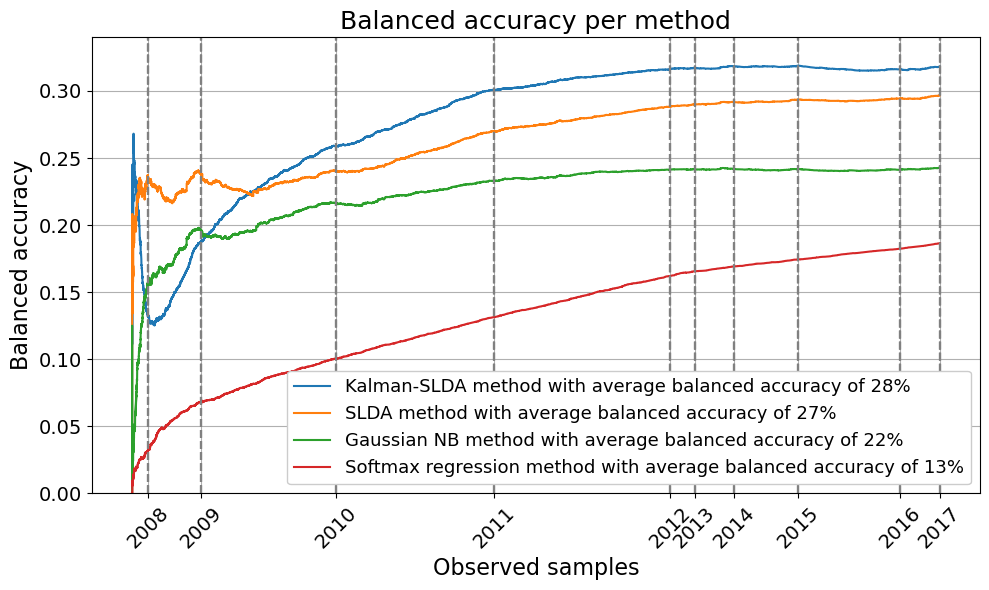

In [7]:
fig_directory = f"figures/Initial data"
classification_method[0] = "Kalman-SLDA"
years = list(range(2008, 2018))
print_bal_acc_for_more_functions(compare_metrics, classification_method, cum_sizes, years, fig_directory)

Accuracy over each batch: [0.0707, 0.1331, 0.2, 0.2497, 0.2737, 0.2815, 0.2851, 0.2894, 0.2925, 0.2941]
Final accuracy is: 0.2488
Balanced accuracy over each batch: [0.0229, 0.0543, 0.085, 0.116, 0.1469, 0.164, 0.1672, 0.1717, 0.1785, 0.1843]
Final balanced accuracy is: 0.1313


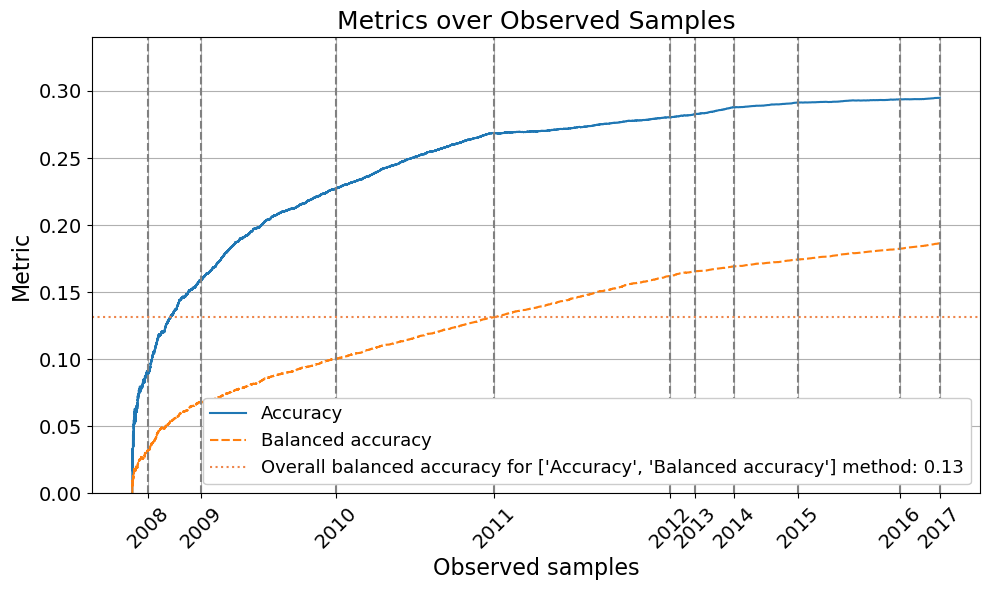

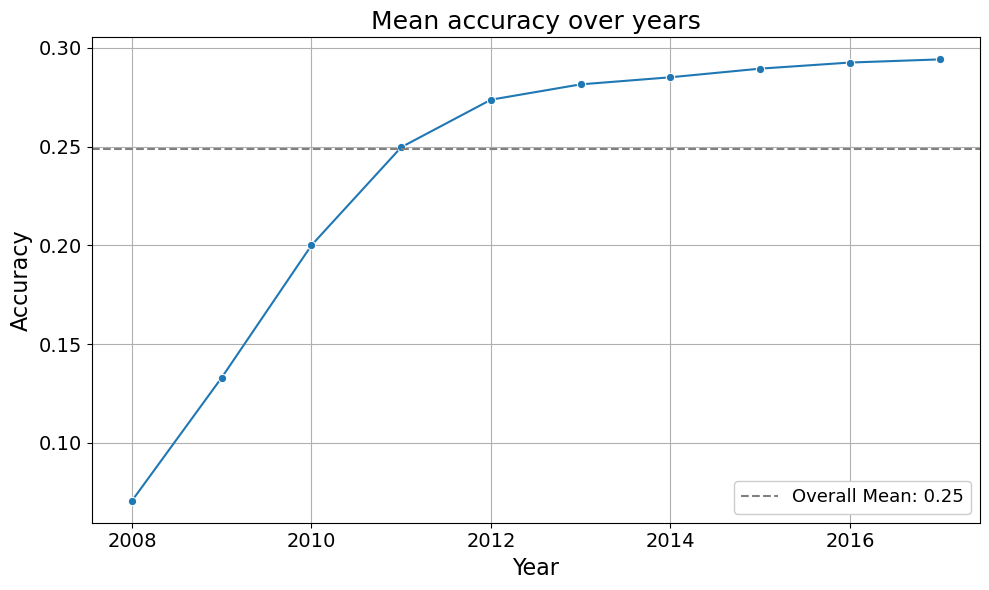

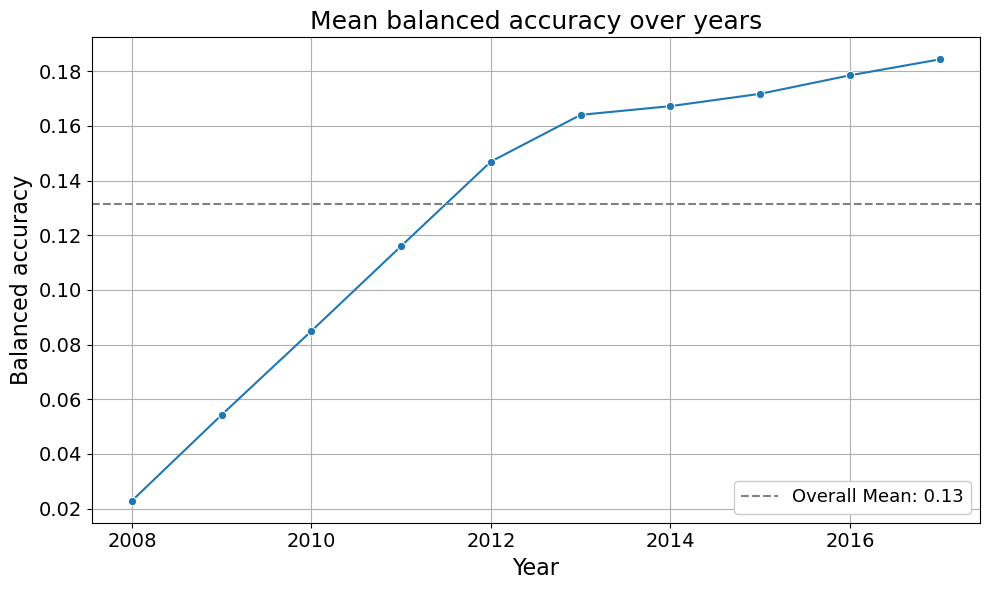

In [6]:
# Plot the obtained metrics
years = list(range(2008, 2018))
print_base_metrics(metrics, cum_sizes, years, fig_directory)

#print_rolling_metrics(metrics, cum_sizes, fig_directory)

# Plot the average accuracy and balanced accuracy
(mean_acc, full_mean) = print_means(cum_sizes, metrics, years[:len(sizes)], fig_directory, "accuracy", 0)
print(f'Accuracy over each batch: {[round(mean, 4) for mean in mean_acc]}')
print(f'Final accuracy is: {full_mean:.4f}')

(mean_acc, full_mean) = print_means(cum_sizes, metrics, years[:len(sizes)], fig_directory, "balanced accuracy", 1)
print(f'Balanced accuracy over each batch: {[round(mean, 4) for mean in mean_acc]}')
print(f'Final balanced accuracy is: {full_mean:.4f}')